In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = 'drive/MyDrive/Thesis/Data/annotated/'
annotator1 = base_dir + 'annotator1.csv'
annotator2 = base_dir + 'annotator2.csv'

In [ ]:
import pandas as pd

annotator1 = pd.read_csv(annotator1).drop(columns=["Comments"])
annotator2 = pd.read_csv(annotator2).drop(columns=["Comments"])

In [ ]:
annotator1.head()

,id,text,label
0,20206,زن و بچه گناهی ندارن عموما ، چرا میگی اصل ا...,Nonpolitical
1,20207,بعد شستن ظرفا میگی اخیش تموم شد، با یه فنجون چ...,Nonpolitical
2,20208,كير خر ! چيش خنده داره ؟ دختررو ميزنه تو ميخ...,Nonpolitical
3,20209,آینده‌ی کسب و کارهای آینده به تلاش ما برای افز...,Nonpolitical
4,20210,یکبارشهامت داشته باشید و صریح به مخاطبین پاس...,Political


In [ ]:
annotator2.head()

,id,text,label
0,20206,زن و بچه گناهی ندارن عموما ، چرا میگی اصل ا...,Nonpolitical
1,20207,بعد شستن ظرفا میگی اخیش تموم شد، با یه فنجون چ...,Nonpolitical
2,20208,كير خر ! چيش خنده داره ؟ دختررو ميزنه تو ميخ...,Nonpolitical
3,20209,آینده‌ی کسب و کارهای آینده به تلاش ما برای افز...,Political
4,20210,یکبارشهامت داشته باشید و صریح به مخاطبین پاس...,Political


In [ ]:
dataset = pd.merge(annotator1, annotator2, on=['id', 'text']).drop(columns=['id'])

In [ ]:
dataset.head()

,text,label_x,label_y
0,زن و بچه گناهی ندارن عموما ، چرا میگی اصل ا...,Nonpolitical,Nonpolitical
1,بعد شستن ظرفا میگی اخیش تموم شد، با یه فنجون چ...,Nonpolitical,Nonpolitical
2,كير خر ! چيش خنده داره ؟ دختررو ميزنه تو ميخ...,Nonpolitical,Nonpolitical
3,آینده‌ی کسب و کارهای آینده به تلاش ما برای افز...,Nonpolitical,Political
4,یکبارشهامت داشته باشید و صریح به مخاطبین پاس...,Political,Political


In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(dataset["label_x"], dataset["label_y"])

0.7657654848597426

In [ ]:
dataset[dataset["label_x"] != dataset["label_y"]]

,text,label_x,label_y
3,آینده‌ی کسب و کارهای آینده به تلاش ما برای افز...,Nonpolitical,Political
12,من هم مثل شما هیج اعتمادی نداشتم اما وقتی با...,Nonpolitical,Political
19,نمدونم چرا فکر میکردم سمت شهرهای شمال غرب کش...,Nonpolitical,Political
40,بهتر است که این پولها را خرج خورد و خوراک فقیر...,Nonpolitical,Political
46,دمت گرم واقعا. میرم ببینم می‌تونم خودمو جمع و...,Political,Nonpolitical
...,...,...,...
9956,شما یه روز صبح زود برید دم درب سفارت ها ببینی...,Nonpolitical,Political
9958,اگر این ماهواره یا موسک متکی به صنعت ودانش فن...,Nonpolitical,Political
9982,من هنوز نکات خواص مواد یادمه، ازم نخواه بدی ها...,Political,Nonpolitical
9991,اگر ژاپن بودیم، قطعا از اشک این عزیزان برق تول...,Nonpolitical,Political


In [ ]:
agreement_dataset = dataset.copy()
agreement_dataset["label_z"] = agreement_dataset["label_y"]

In [ ]:
for index, row in dataset.iterrows():
    if index < 5000:
        continue
    if row["label_x"] != row["label_y"]:
        print(f"Index: {index}")
        print(f"Text:\n{row['text']}")
        print(f"Annotator1: {row['label_x']}")
        print(f"Annotator2: {row['label_y']}")
        final_vote = input("Final Label:")
        new_row = agreement_dataset.iloc[index]
        if final_vote == "1":
            new_row[3] = "Political"
        else:
            new_row[3] = "Nonpolitical"
        agreement_dataset.iloc[index] = new_row

Index: 5015
Text:
 شکست همین طرح مثلا که بخش عمده ی هزینه رو بجای صرف در درمان و بهداشت، صرف پزشکان کرد. بحث دولتی کردن صندوق تامین اجتماعی برای برداشتن ازش بخاطر بدهی های این طرح، بیمارستانهایی که دارن تعطیل میشن و ....
Annotator1: Nonpolitical
Annotator2: Political
Final Label:2


/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


Index: 5028
Text:
  #MAGA #RestartMIGA #MIGA #InviteRestartLeaderToWarsaw#BuildTheWall #TRUMP2020جان گرگان و سگان از هم جداستمتحد جان های شیران خداست
Annotator1: Political
Annotator2: Nonpolitical
Final Label:1
Index: 5037
Text:
ایران خودرو دوباره قیمت هر کدوم از خودروهاش رو یکی 10-12 ملیون با اجازه مستقیم دولت یکشبه افزایش قیمت داد.با تشکر از مسئولیت دلسوز دولت و خودروسازان محترمچیز دیگه ای میشه گفت؟
Annotator1: Nonpolitical
Annotator2: Political
Final Label:2
Index: 5041
Text:
یه دفعه سه اسکاربیت تخمی نامزد نشده ملت شاکی ان. لیترالی فیلمش اسکار بیت بوده، اصلن هم خوب نبوده چرا انقدر گیرن روش؟؟
Annotator1: Nonpolitical
Annotator2: Political
Final Label:2
Index: 5054
Text:
   دقیقا مهرزاد گرامی!ماتحت لیسی یهود واسه برخی فرنگ نشینها شده به خطا برگه مثبت ! اینها از بخت بد خودشون رو ایران پرست میدونن!
Annotator1: Political
Annotator2: Nonpolitical
Final Label:1
Index: 5061
Text:
چاووش اوغلو: کشورهای ضامن روند آستانه، 25 بهمن در سوچی دور هم جمع می‌شوند
Annotator1: Political
Annotator2: Nonp

In [ ]:
agreement_dataset.head()

,text,label_x,label_y,label_z
0,زن و بچه گناهی ندارن عموما ، چرا میگی اصل ا...,Nonpolitical,Nonpolitical,Nonpolitical
1,بعد شستن ظرفا میگی اخیش تموم شد، با یه فنجون چ...,Nonpolitical,Nonpolitical,Nonpolitical
2,كير خر ! چيش خنده داره ؟ دختررو ميزنه تو ميخ...,Nonpolitical,Nonpolitical,Nonpolitical
3,آینده‌ی کسب و کارهای آینده به تلاش ما برای افز...,Nonpolitical,Political,Nonpolitical
4,یکبارشهامت داشته باشید و صریح به مخاطبین پاس...,Political,Political,Political


In [ ]:
final_dataset = base_dir + "full_dataset.csv"

agreement_dataset.to_csv(final_dataset)

In [ ]:
hf_dataset = agreement_dataet.drop(columns=["label_x", "label_y"]).rename({'label_z': 'label'}, axis=1)

In [ ]:
hf_dataset.head()

,text,label
0,زن و بچه گناهی ندارن عموما ، چرا میگی اصل ا...,Nonpolitical
1,بعد شستن ظرفا میگی اخیش تموم شد، با یه فنجون چ...,Nonpolitical
2,كير خر ! چيش خنده داره ؟ دختررو ميزنه تو ميخ...,Nonpolitical
3,آینده‌ی کسب و کارهای آینده به تلاش ما برای افز...,Nonpolitical
4,یکبارشهامت داشته باشید و صریح به مخاطبین پاس...,Political


In [ ]:
hf_dataset_dir = base_dir + "dataset.csv"

hf_dataset.to_csv(hf_dataset_dir)

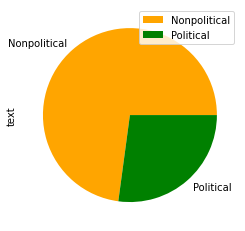

In [ ]:
hf_dataset.groupby(['label']).count().plot(kind='pie', y='text', colors = ['orange', 'green'])